In [91]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
df = pd.read_csv("data.csv")
df
# Predicted Stress

,Unnamed: 0,ID,Design,Direction,Displacement Rate,Stress,Strain
0,0,1,0,0,0.1,0.000006,0.000006
1,1,1,0,0,0.1,0.000035,0.000005
2,2,1,0,0,0.1,0.000465,0.000014
3,3,1,0,0,0.1,0.000192,0.000015
4,4,1,0,0,0.1,0.000379,0.000009
...,...,...,...,...,...,...,...
108737,108737,24,5,1,1.8,18.729373,1.054368
108738,108738,24,5,1,1.8,18.732007,1.054443
108739,108739,24,5,1,1.8,18.730772,1.054470
108740,108740,24,5,1,1.8,18.731807,1.054539


In [92]:
df.drop(columns=['Unnamed: 0'], axis=1)

,ID,Design,Direction,Displacement Rate,Stress,Strain
0,1,0,0,0.1,0.000006,0.000006
1,1,0,0,0.1,0.000035,0.000005
2,1,0,0,0.1,0.000465,0.000014
3,1,0,0,0.1,0.000192,0.000015
4,1,0,0,0.1,0.000379,0.000009
...,...,...,...,...,...,...
108737,24,5,1,1.8,18.729373,1.054368
108738,24,5,1,1.8,18.732007,1.054443
108739,24,5,1,1.8,18.730772,1.054470
108740,24,5,1,1.8,18.731807,1.054539


<Axes: >

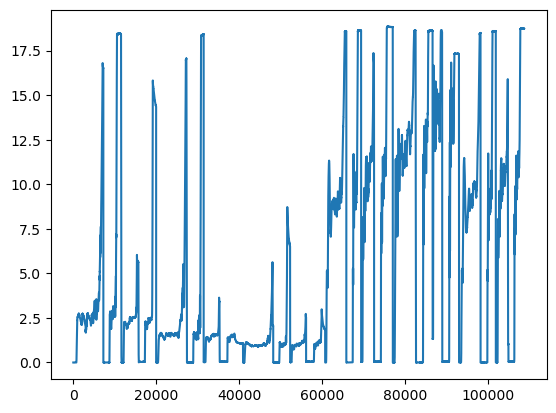

In [93]:
stress = df['Stress']
stress.plot()

In [94]:
def df_to_X_y(df, window_size ):  #5 in example
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)- window_size):
        row = [[a] for a in df_as_np[i: i + window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [95]:
WINDOW_SIZE = 10
X, y = df_to_X_y(stress, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(108732, 10, 1)
(108732,)


In [96]:
#Column used to split data

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
cp = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [99]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 33.6404 - root_mean_squared_error: 5.7117 - val_loss: 0.2144 - val_root_mean_squared_error: 0.4631
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0765 - root_mean_squared_error: 0.2733 - val_loss: 0.1016 - val_root_mean_squared_error: 0.3188
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0372 - root_mean_squared_error: 0.1908 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2925
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0207 - root_mean_squared_error: 0.1370 - val_loss: 0.0783 - val_root_mean_squared_error: 0.2798
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0180 - root_mean_squared_error: 0.1290 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3158
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0211 - root_mean_squared_error: 0.1419 - val_loss: 0.0738 - val_root_mean_squared_error: 0.2717
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━

In [100]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')

In [101]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 548us/step


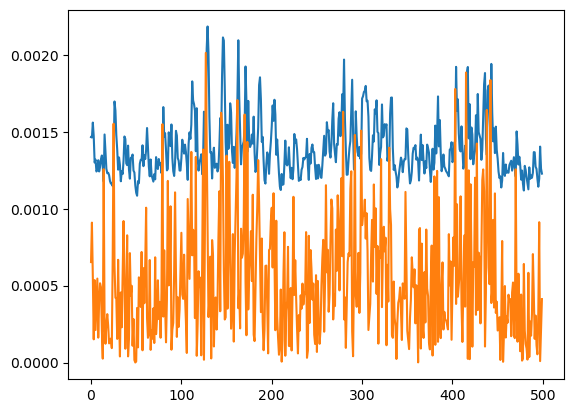

In [102]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:500])
plt.plot(train_results['Actuals'][:500])

In [103]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


,Val Predictions,Actuals
0,0.037628,0.037549
1,0.037438,0.038865
2,0.037923,0.036468
3,0.037141,0.039533
4,0.038017,0.036180
...,...,...
8995,0.001851,0.001002
8996,0.001841,0.001747
8997,0.002157,0.000535
8998,0.001814,0.000484


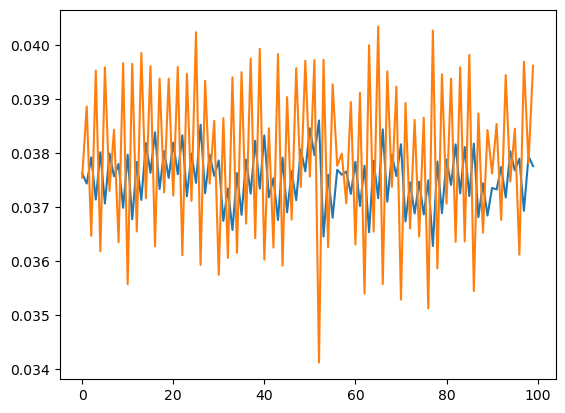

In [104]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [105]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


,Test Predictions,Actuals
0,0.001679,0.000754
1,0.001594,0.001157
2,0.001715,0.001158
3,0.001807,0.001301
4,0.001929,0.000785
...,...,...
9727,18.716099,18.729373
9728,18.714720,18.732007
9729,18.715630,18.730772
9730,18.715273,18.731807


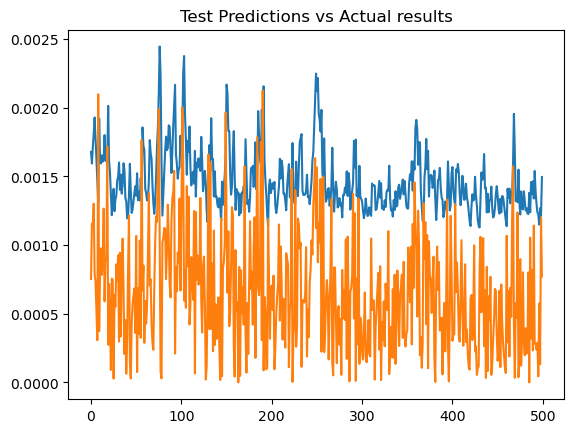

In [171]:
import matplotlib.pyplot as plt
plt.title('Test Predictions vs Actual results')
plt.plot(test_results['Test Predictions'][:500])
plt.plot(test_results['Actuals'][:500])

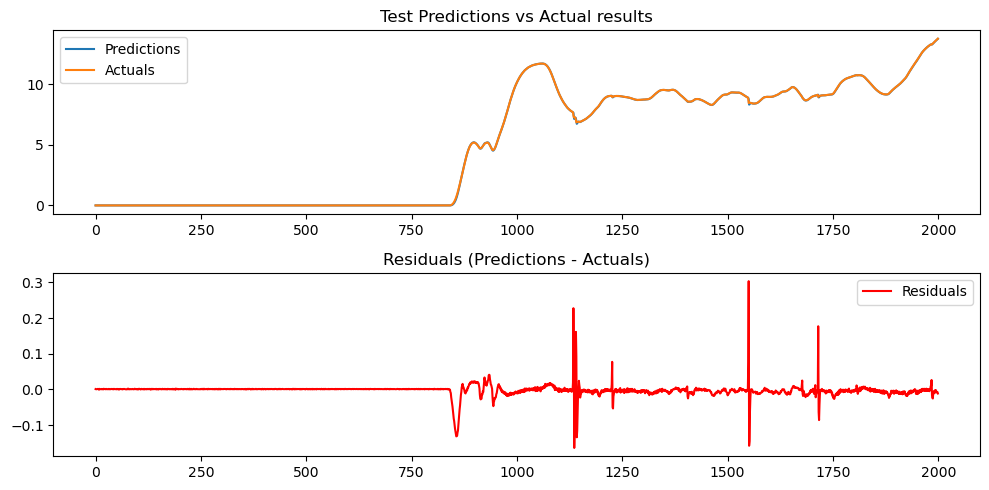

In [167]:
import matplotlib.pyplot as plt

# Assuming test_results is a DataFrame or similar with 'Test Predictions' and 'Actuals' columns
predictions = test_results['Test Predictions'][:2000]
actuals = test_results['Actuals'][:2000]

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(predictions, label='Predictions')
plt.plot(actuals, label='Actuals')
plt.title('Test Predictions vs Actual results')
plt.legend()

# Plotting the residuals
residuals = predictions - actuals
plt.subplot(2, 1, 2)
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals (Predictions - Actuals)')
plt.legend()

plt.tight_layout()
plt.show()


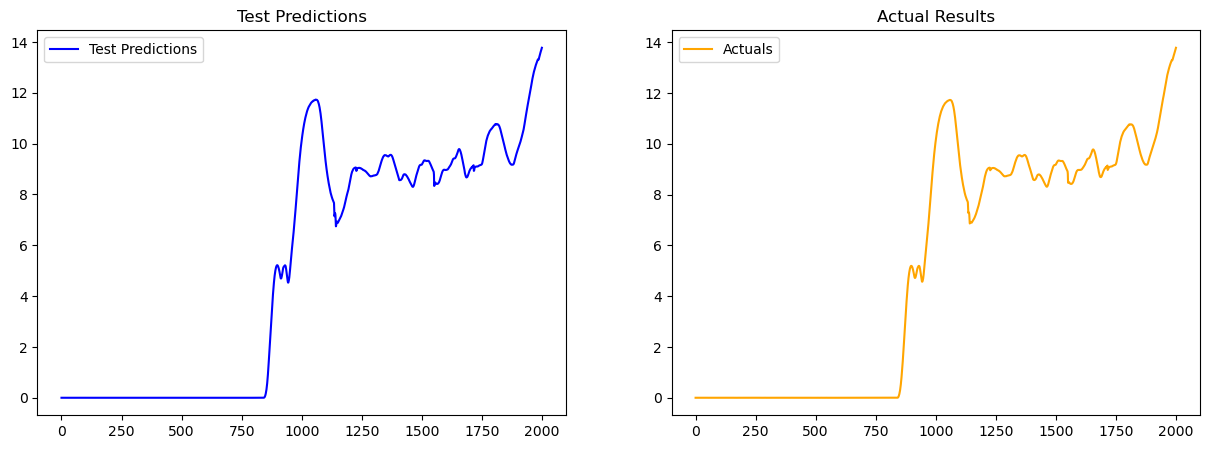

In [169]:
import matplotlib.pyplot as plt

# Assuming test_results is a DataFrame or similar with 'Test Predictions' and 'Actuals' columns
predictions = test_results['Test Predictions'][:2000]
actuals = test_results['Actuals'][:2000]

# Creating a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the predictions on the first subplot
axs[0].plot(predictions, label='Test Predictions', color='blue')
axs[0].set_title('Test Predictions')
axs[0].legend()

# Plotting the actual results on the second subplot
axs[1].plot(actuals, label='Actuals', color='orange')
axs[1].set_title('Actual Results')
axs[1].legend()

plt.show()
